# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df =pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combined_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_total = len(combined_df["Mouse ID"].unique())
mouse_total

249

In [3]:
# # Our data should be uniquely identified by Mouse ID and Timepoint
# # Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.



# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# time_points = combined_df["Timepoint"].value_counts()
# ID_count = combined_df['Mouse ID'].value_counts().reset_index()



# # duplicate_mice
# duplicate_mice_row=ID_count.loc[ID_count['Mouse ID']>len(time_points)]
# duplicate_mice=duplicate_mice_row.iloc[0,0]
# duplicate_mice


duplicates_found = combined_df.duplicated(subset = ['Mouse ID','Timepoint'])
duplicates_found
duplicate_results = combined_df.loc[duplicates_found, 'Mouse ID'].unique()
duplicate_results

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data=combined_df.loc[combined_df['Mouse ID']=='g989']
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df.loc[combined_df['Mouse ID']!= 'g989']

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_Tumor_Volume=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
std_Tumor_Volume=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
var_Tumor_Volume=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sem_Tumor_Volume=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_summary = pd.DataFrame({"Mean": mean_tumor_volume, 
                              "Median": median_Tumor_Volume,
                              "Standard Deviation": std_Tumor_Volume,
                              "Variance": var_Tumor_Volume,
                              "SEM": sem_Tumor_Volume})

tumor_summary 

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'std', 'var', 'sem']})



# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

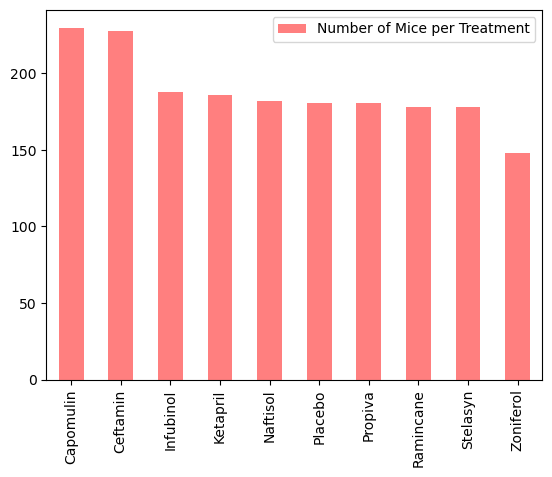

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_name = clean_data['Drug Regimen'].value_counts().index.values
drug_count = clean_data['Drug Regimen'].value_counts().values
index = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propiva', 'Ramincane', 'Stelasyn', 'Zoniferol']


bar_df = pd.DataFrame({'Drug Name': drug_name, 'Number of Mice per Treatment': drug_count}, index = index)

bar_chart = bar_df.plot.bar(color='red', alpha = 0.5)

            

<function matplotlib.pyplot.show(close=None, block=None)>

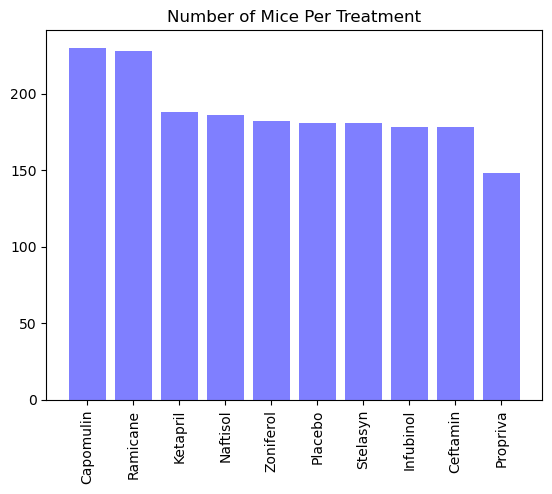

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_name = clean_data['Drug Regimen'].value_counts().index.values
drug_count = clean_data['Drug Regimen'].value_counts().values



plt.bar(drug_name, drug_count, color = "blue", alpha = 0.5, align='center',)
plt.xticks(rotation=90)
plt.title("Number of Mice Per Treatment")
plt.show

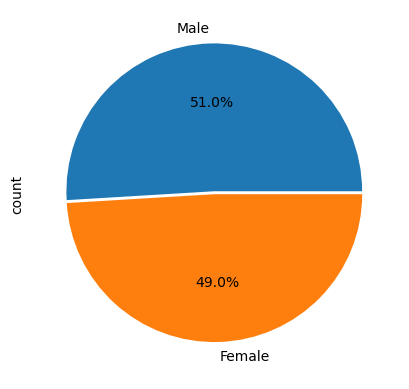

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data['Sex'].value_counts()
explode = (0.02, 0)
pie_chart = sex.plot.pie(autopct='%1.1f%%', explode=explode)

<function matplotlib.pyplot.show(close=None, block=None)>

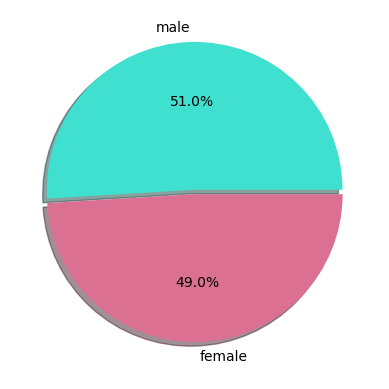

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex = clean_data['Sex'].value_counts()
labels = ['male', 'female']
explode = (0.03, 0)
colors = "turquoise", "palevioletred"
plt.pie(sex, explode = explode, labels = labels, autopct='%1.1f%%', colors = colors, shadow = True )
plt.title:('Distribution of Sex in Subjects')
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
clean_data

    
    
    



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
#for loop (california housing prices)

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_size_final = []
drug_regimen = []

reduced_df = clean_data.set_index('Drug Regimen').loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], :].sort_values(by ='Mouse ID')







In [17]:
# Start by getting the last (greatest) timepoint for each mouse



#Retrieve Mice ID 
mouse_id_reduced=reduced_df['Mouse ID'].unique()

tumor_size_final = []
drug_regimen = []


for m in mouse_id_reduced: 
    last_timepoint = reduced_df.loc[reduced_df["Mouse ID"] == m].sort_values(by = 'Timepoint', ascending = False)
    tumor_volume = last_timepoint.iloc[0,5]
    tumor_size_final.append(tumor_volume)
    drug_regimen.append(last_timepoint.reset_index().iloc[0,0])
    

    print(tumor_volume)
    print(last_timepoint)
    
tumor_df =pd.DataFrame({"Mouse ID": mouse_id_reduced, "Final Tumor Size":tumor_size_final})
#tumor_df
   
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(clean_data, tumor_df, on = 'Mouse ID', how = 'inner')
final_df

['Infubinol',
 'Infubinol',
 'Ceftamin',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Infubinol',
 'Ramicane',
 'Infubinol',
 'Capomulin',
 'Ceftamin',
 'Ceftamin',
 'Capomulin',
 'Ceftamin',
 'Infubinol',
 'Infubinol',
 'Ramicane',
 'Ramicane',
 'Infubinol',
 'Ramicane',
 'Infubinol',
 'Ramicane',
 'Infubinol',
 'Ceftamin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Ramicane',
 'Ceftamin',
 'Ramicane',
 'Ramicane',
 'Infubinol',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Ceftamin',
 'Ramicane',
 'Ramicane',
 'Ceftamin',
 'Ramicane',
 'Infubinol',
 'Infubinol',
 'Ceftamin',
 'Ceftamin',
 'Capomulin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Capomulin',
 'Ramicane',
 'Capomulin',
 'Infubinol',
 'Capomulin',
 'Ramicane',
 'Infubinol',
 'Ceftamin',
 'Infubinol',
 'Infubinol',
 'Ceftamin',
 'Infubinol',
 'Ceftamin',
 'Ramicane',
 'Ramicane',
 'Capomulin',
 'Capomulin',
 'Ramicane',
 'Ramicane',
 'Capomulin',
 'Infubinol',
 'Capomulin',
 'Ramicane',
 'Capomulin',
 'Capomulin',
 

there are 0 in treatment Ramicane.
there are 0 in treatment Capomulin.
there are 2 in treatment Infubinol.
there are 13 in treatment Ceftamin.


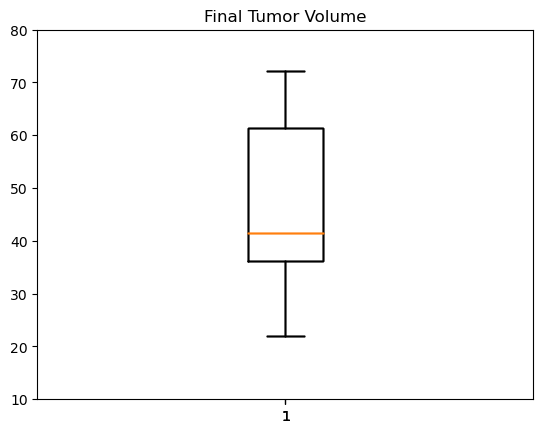

In [19]:



# Put treatments into a list for for loop (and later for plot labels)
regimen_list = final_df['Drug Regimen'].unique()



#Create empty list to fill with tumor vol data (for plotting)
vol_list = []

for t in regimen_list:
    final_df_ordered = final_df.loc[final_df['Drug Regimen'] == t].sort_values('Final Tumor Size')
    quartiles = final_df_ordered['Final Tumor Size'].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile 
    vol_list.append(final_df['Final Tumor Size'])
    
 
    
    plt.boxplot(final_df['Final Tumor Size'])
    plt.title("Final Tumor Volume")
    plt.ylim(10,80)
    plt.show
    
    
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    outliers= final_df_ordered.loc[(final_df_ordered['Final Tumor Size']>1.5*IQR+upper_quartile) | (final_df_ordered['Final Tumor Size']<lower_quartile-1.5*IQR)]
    print(f"there are {len(outliers)} in treatment {t}.")
    
#     outliers= FTS_sorted.loc[(FTS_sorted['Final Tumor Size']>1.5*IQR+upper) | (FTS_sorted['Final Tumor Size']<lower-1.5*IQR)]
#     print(f'There are {len(outliers)} outliers in the Final Tumor Size for the mice on {d} regimen! ') 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


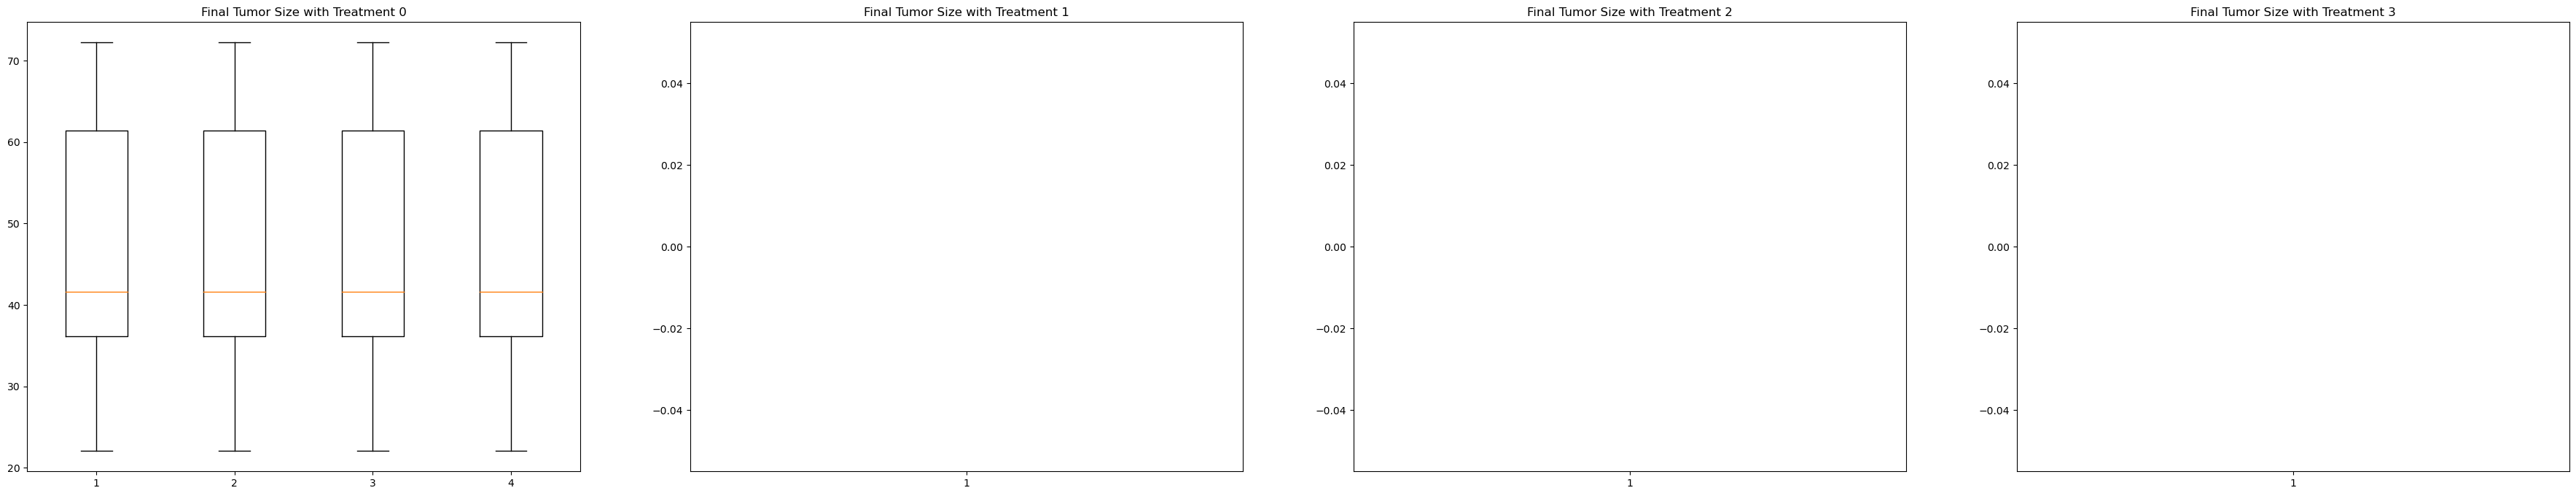

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_data =  [vol_list[0:24],vol_list[25:49], vol_list[50:74], vol_list[75:100]]
fig1, axs = plt.subplots(1,4, figsize = (45, 8))
for v in range(4):
    axs[v].boxplot(boxplot_data[v])
    axs[v].set_title(f"Final Tumor Size with Treatment {v}")
    plt.show

## Line and Scatter Plots

b742


Text(0.5, 0, 'Time Point')

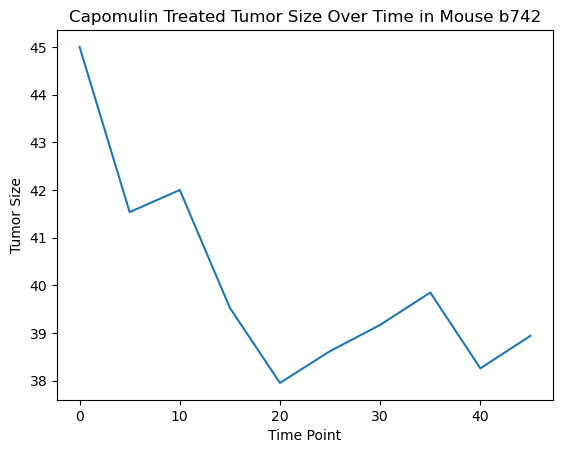

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_result = final_df.set_index('Drug Regimen').loc['Capomulin', :].sort_values(['Mouse ID', 'Timepoint'])

mouse_result = capomulin_result.iloc[10,0]
print(mouse_result)
capomulin_result_df=capomulin_result.loc[capomulin_result.iloc[:,0]==mouse_result,:]
capomulin_result_df
x_axis = capomulin_result_df.iloc[:,4]
y_axis = capomulin_result_df.iloc[:,5]
plt.plot(x_axis, y_axis) 
plt.title('Capomulin Treated Tumor Size Over Time in Mouse b742')
plt.ylabel('Tumor Size')
plt.xlabel('Time Point')

PearsonRResult(statistic=0.8629774187448616, pvalue=1.526940041841683e-69)


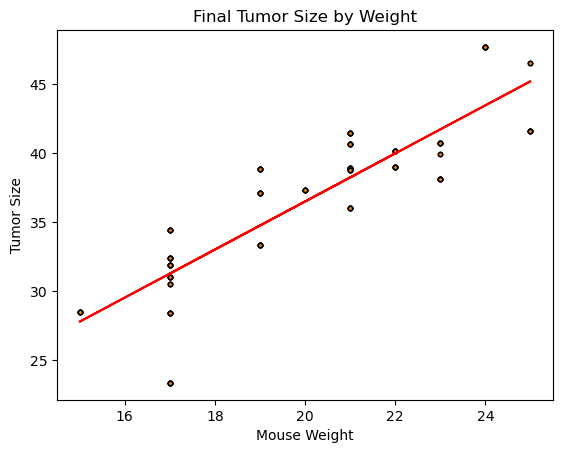

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
from sklearn import datasets
from scipy.stats import linregress

x_axis = capomulin_result['Weight (g)']
y_axis = capomulin_result['Final Tumor Size']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept 
correlation = st.pearsonr(x_axis, y_axis)
plt.scatter(x_axis, y_axis, marker = '.', facecolors = 'darkorange', edgecolors = 'black')
plt.plot(x_axis, regress_values, "r-")

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size')
plt.title('Final Tumor Size by Weight')
plt.show 

print(correlation)

## Correlation and Regression

In [ ]:
#see above 